In [1]:
%load_ext autoreload
%autoreload 2 
%matplotlib inline

In [4]:
import h5py
import numpy as np 
import matplotlib.pyplot as plt 
import sys

In [5]:
sys.path.append("../")

In [6]:
import extract_catalog as extcat

In [6]:
h5File = \
    "../../data/" + \
    "Illustris-1_fof_subhalo_myCompleteHaloCatalog_00135.hdf5"
f = h5py.File(h5File, "r")

In [7]:
groupmass = f["Group"]["GroupMass"][:]

only compute the relaxedness for massive enough halos

In [8]:
ix = groupmass > 1e3
clstNo = np.where(groupmass > 1e3)
clstNo = clstNo[0]

In [226]:
groupPos = f["Group"]["GroupPos"][:, ix]

In [9]:
groupMass = f["Group"]["GroupMass"][ix]
groupM200C = f["Group"]["Group_M_Crit200"][ix]
groupR200C = f["Group"]["Group_R_Crit200"][ix]

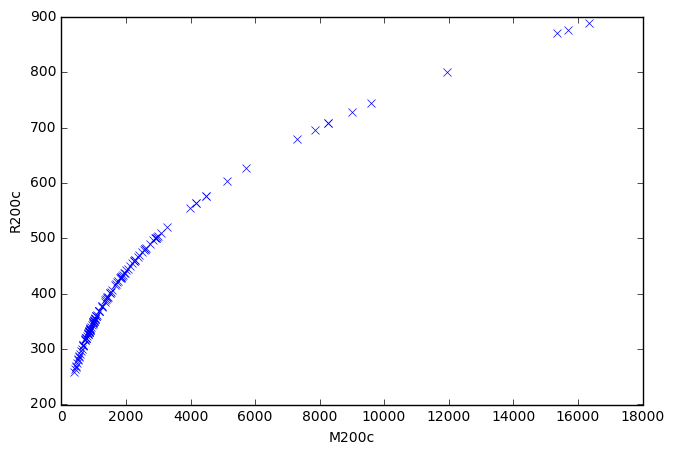

In [10]:
plt.plot(groupM200C, groupR200C, 'x')
plt.xlabel("M200c")
plt.ylabel("R200c")

careful about the df in the clst_dfs 

In [7]:
%time clst_dfs = map(lambda x: extcat.extract_clst(f, x), clstNo)

NameError: name 'clstNo' is not defined

In [259]:
subhaloTotalMass = \
    np.array([np.sum(clst_dfs[i]["SubhaloMass"][1:]) 
              for i in range(len(clstNo))])

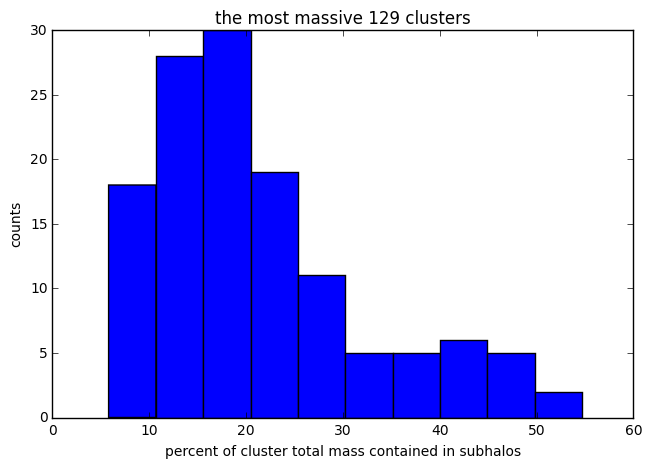

In [260]:
_, _, _ = plt.hist(subhaloTotalMass / groupMass * 100)
#plt.axvline(90, color="r")
#plt.figtext(0.5, 0.5, "# of relaxed clst: {0}".format(
#    np.sum(subhaloTotalMass / groupMass[:100] * 100 > 90)))
plt.title("the most massive {0} clusters".format(len(clstNo)))
plt.xlabel("percent of cluster total mass contained in subhalos")
plt.ylabel("counts")

In [239]:
def subhalo_cent_dist(subhaloPos1, subhaloPos2, subhaloPos3):
    groupPos = np.array([subhaloPos1[0], 
                         subhaloPos2[0],
                         subhaloPos3[0]])
    vec = \
        groupPos - \
        np.array([subhaloPos1, subhaloPos2, subhaloPos3]).transpose()
    
    return [np.sqrt(np.dot(v, v)) for v in vec]

In [279]:
for i in range(len(clstNo)):
    clst_dfs[i]["Pos_dist"] = \
        subhalo_cent_dist(clst_dfs[i]["SubhaloPos0"],
                          clst_dfs[i]["SubhaloPos1"],
                          clst_dfs[i]["SubhaloPos2"])
        
    clst_dfs[i]["Pos_dist"] = clst_dfs[i]["Pos_dist"] / groupR200C[i]

In [280]:
SubhaloSumedMass = np.array(
    [np.sum(clst_dfs[i]["SubhaloMass"][np.logical_and(
        clst_dfs[i]["Pos_dist"] < 1,
        clst_dfs[i]["Pos_dist"] > 0.)]) 
             for i in range(len(clstNo))])

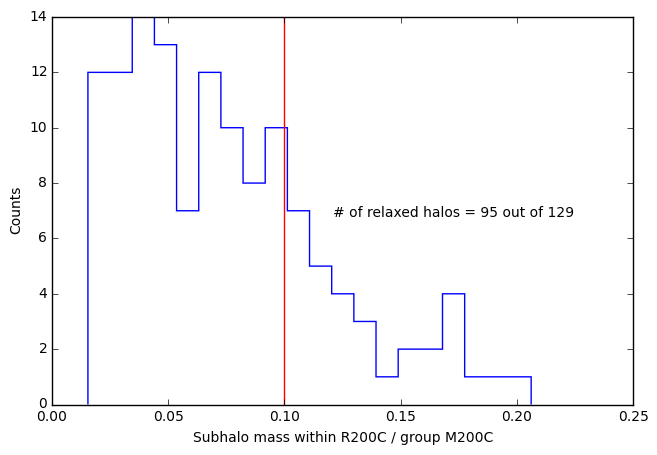

In [287]:
_, _, _ = plt.hist(SubhaloSumedMass / groupM200C, bins=20,
                   histtype="step")
plt.ylabel("Counts")
plt.xlabel("Subhalo mass within R200C / group M200C")
plt.figtext(0.5, 0.5, "# of relaxed halos = {0} out of {1}".format(
    np.sum(SubhaloSumedMass / groupM200C < .1), len(clstNo)))
plt.axvline(0.1, color="r")